In [2]:
import pandas as pd
import numpy as np
# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
# Drop all categorical columns except ’Survived’
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10:
    data[column].fillna(data[column].mean(), inplace=True)
  else:
    data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


<ipython-input-2-0af85d2ff4fc>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [3]:
import numpy as np
# Separate features (X) and target (y)
X = data.drop(columns=['Survived']).values # Convert features to NumPy array
y = data['Survived'].values # Convert target to NumPy array
# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
  """
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


In [4]:
def euclidean_distance(point1, point2):
  """
  Calculate the Euclidean distance between two points in n-dimensional space.
  Arguments:
  point1 : np.ndarray
  The first point as a numpy array.
  point2 : np.ndarray
  The second point as a numpy array.
  Returns:
  float
  The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  """
  # Check if the points are of the same dimension
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [5]:
try:
  # Define two points
  point1 = np.array([3, 4])
  point2 = np.array([0, 0])
  # Calculate the distance
  result = euclidean_distance(point1, point2)
  # Check if the result matches the expected value (e.g., sqrt(3^2 + 4^2) = 5)
  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed successfully!")
except ValueError as ve:
  print(f"ValueError: {ve}")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [6]:
# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [7]:
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
  predictions=[knn_predict_single(x,X_train, y_train,k)for x in X_test]
  return np.array(predictions)

In [8]:
# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


In [9]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [10]:
# Perform prediction on the entire test set
try:
  # Make predictions on the entire test set
  predictions = knn_predict(X_test, X_train, y_train, k=3)
  # Compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 61.80%


In [11]:
# Function to test KNN on different values of k and plot the accuracies
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  for k in k_values:
    # Make predictions using the current value of k
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker="o")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of KNN with Different Values of k")
    plt.grid(True)
    plt.show()
    return accuracies

Accuracy for k=1: 58.43%
An unexpected error occurred during the experiment: x and y must have same first dimension, but have shapes (20,) and (1,)


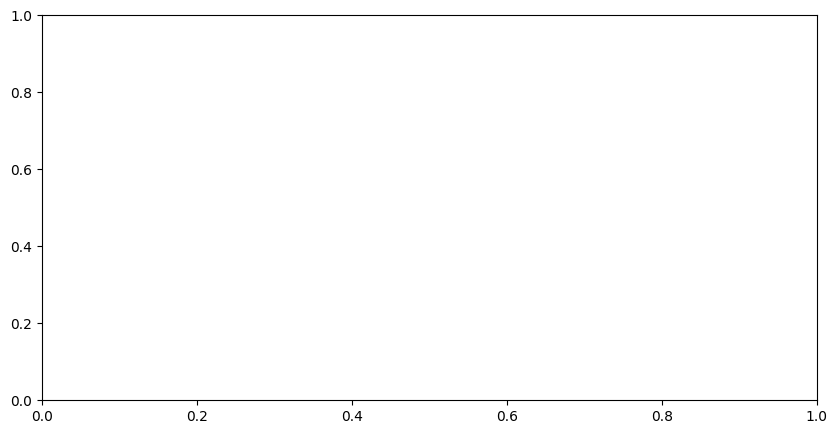

In [12]:
# Define the range of k values to experiment with
k_values = range(1, 21) # You can adjust this range as needed
# Run the experiment
try:
  accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
  print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
  print(f"An unexpected error occurred during the experiment: {e}")

In [14]:
import pandas as pd
import numpy as np
diabetes = pd.read_csv("/content/drive/MyDrive/diabetes (1).csv")

#Displaying few rows
print(diabetes.head())

#showing summary
print(diabetes.describe())

#checking missing values
print(diabetes.isnull().sum())

# 2. Handle Missing Data:
# • Handle any missing values appropriately, either by dropping or imputing them based on the data.
diabetes.fillna(diabetes.mean(), inplace=True)
print("\n rechecking the missing values: \n")
print(diabetes.isnull().sum())

# 3. Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
# # • Perform a train - test split from scratch using a 70% − 30% ratio.
# assigning the values to x and y
x = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

def split(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test
# Perform the train-test split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# 4. Implement KNN:
# • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# • Compute distances using Euclidean distance.
# • Write functions for:
# – Predicting the class for a single query.
# – Predicting classes for all test samples.
# • Evaluate the performance using accuracy.
def euxlidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

def predict_single_point(x_query, X_train, y_train, k=3):
    distances = [euclidean_distance(x_query, x_train) for x_train in X_train]
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_indices]
    return np.bincount(k_nearest_labels).argmax()

def predict(X_test, X_train, y_train, k=3):
    return np.array([predict_single_point(x, X_train, y_train, k) for x in X_test])


#evaluating the performance
k = 5
y_pred = predict(X_test, X_train, y_train, k)

#checking the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"\nAccuracy with k={k}: {accuracy * 100}%")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

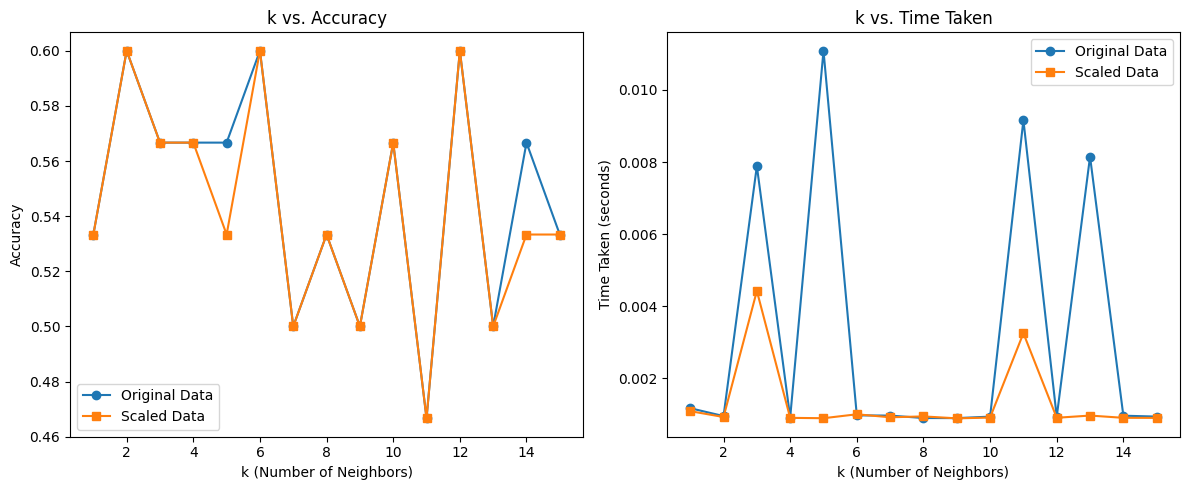


** Comparative Analysis **
Scaling impact on performance:
- Accuracy on original data vs. scaled data:
k=1: Original Accuracy=0.5333, Scaled Accuracy=0.5333
k=2: Original Accuracy=0.6000, Scaled Accuracy=0.6000
k=3: Original Accuracy=0.5667, Scaled Accuracy=0.5667
k=4: Original Accuracy=0.5667, Scaled Accuracy=0.5667
k=5: Original Accuracy=0.5667, Scaled Accuracy=0.5333
k=6: Original Accuracy=0.6000, Scaled Accuracy=0.6000
k=7: Original Accuracy=0.5000, Scaled Accuracy=0.5000
k=8: Original Accuracy=0.5333, Scaled Accuracy=0.5333
k=9: Original Accuracy=0.5000, Scaled Accuracy=0.5000
k=10: Original Accuracy=0.5667, Scaled Accuracy=0.5667
k=11: Original Accuracy=0.4667, Scaled Accuracy=0.4667
k=12: Original Accuracy=0.6000, Scaled Accuracy=0.6000
k=13: Original Accuracy=0.5000, Scaled Accuracy=0.5000
k=14: Original Accuracy=0.5667, Scaled Accuracy=0.5333
k=15: Original Accuracy=0.5333, Scaled Accuracy=0.5333

Scaling generally helps k-NN perform better because it normalizes feature range

In [15]:
# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
# • Use the scaled data for training and testing the kNN Classifier.
# • Record the results.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score

# Scaling function
def scaling(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

# Data splitting function
def splitting(x, y, size=0.3, random=42):
    np.random.seed(random)
    indices = np.random.permutation(len(x))
    split_ind = int(len(x) * (1 - size))
    train_idx, test_idx = indices[:split_ind], indices[split_ind:]
    return x[train_idx], x[test_idx], y[train_idx], y[test_idx]

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

# k-NN classifier
def knn_predict(x_train, y_train, x_test, k=3):
    y_pred = []
    for test_point in x_test:
        distances = euclidean_distance(x_train, test_point)
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

# Experimentation function
def knn_experiment(x, y, k_values=range(1, 16)):
    x_scaled = scaling(x)

    # Split the data
    x_train, x_test, y_train, y_test = splitting(x, y, size=0.3)
    x_train_scaled, x_test_scaled, _, _ = splitting(x_scaled, y, size=0.3)

    # Store results
    results_original = []
    results_scaled = []

    for k in k_values:
        # Original dataset
        start_time = time()
        y_pred = knn_predict(x_train, y_train, x_test, k)
        time_taken = time() - start_time
        accuracy = accuracy_score(y_test, y_pred)
        results_original.append((k, accuracy, time_taken))

        # Scaled dataset
        start_time = time()
        y_pred_scaled = knn_predict(x_train_scaled, y_train, x_test_scaled, k)
        time_taken_scaled = time() - start_time
        accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
        results_scaled.append((k, accuracy_scaled, time_taken_scaled))

    return results_original, results_scaled

# Visualization function
def plot_results(results_original, results_scaled):
    k_values = [r[0] for r in results_original]
    accuracy_original = [r[1] for r in results_original]
    time_original = [r[2] for r in results_original]

    accuracy_scaled = [r[1] for r in results_scaled]
    time_scaled = [r[2] for r in results_scaled]

    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, accuracy_original, label='Original Data', marker='o')
    plt.plot(k_values, accuracy_scaled, label='Scaled Data', marker='s')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('k vs. Accuracy')
    plt.legend()

    # Time plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, time_original, label='Original Data', marker='o')
    plt.plot(k_values, time_scaled, label='Scaled Data', marker='s')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('k vs. Time Taken')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage (replace with your dataset)
# Assuming x and y are defined, where x is the feature matrix and y is the label vector.
# Example dataset (for demonstration):
x = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

# Run experiment
results_original, results_scaled = knn_experiment(x, y)

# Plot results
plot_results(results_original, results_scaled)

# Analysis (discussion points)
def discuss_results(results_original, results_scaled):
    print("\n** Comparative Analysis **")
    print("Scaling impact on performance:")
    print("- Accuracy on original data vs. scaled data:")
    for orig, scaled in zip(results_original, results_scaled):
        print(f"k={orig[0]}: Original Accuracy={orig[1]:.4f}, Scaled Accuracy={scaled[1]:.4f}")

    print("\nScaling generally helps k-NN perform better because it normalizes feature ranges, preventing features with larger scales from dominating.")
    print("\nChallenges of k-NN for large datasets:")
    print("- High computational cost due to distance calculation.")
    print("- Sensitivity to irrelevant or redundant features.")
    print("\nEfficiency improvement strategies:")
    print("- Use of approximate nearest neighbors (ANN).")
    print("- Dimensionality reduction techniques like PCA.")
    print("- Using faster distance metrics or parallel processing.")

discuss_results(results_original, results_scaled)
